In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np

In [3]:
nmis_cp = ['#00294b',
           '#368dbc',
           '#009fe3',
           '#8ec79a',
           '#ffcc00',
           '#ec6608',
           '#d83569',
           '#6f3f81']

In [6]:
oct0 = patches.RegularPolygon((50,50), 8, 30)

In [7]:
import math

def rotate(ox, oy, px, py, angle):
    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

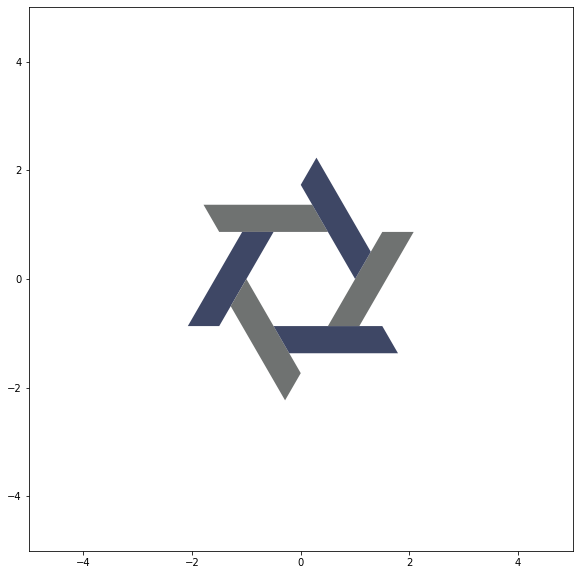

In [8]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)



# define parallelogram width and length
wd = 0.5
wo = wd*math.tan(math.radians(30))
le = 2

hex_x = [0.5, -0.5, -1, -0.5, 0.5, 1]
hex_y = [(math.sqrt(3)/2), (math.sqrt(3)/2), 0, -(math.sqrt(3)/2), -(math.sqrt(3)/2), 0]

# define angle list
ang = [0, 60, 120, 180, 240, 300]

#define color list
nmis_cp = ['#6f7271',
           '#ffcc00',
           '#ec6608',
           '#6f7271',
           '#ffcc00',
           '#ec6608']

nmis_cp = ['#6f7271',
           '#3e4765',
           '#6f7271',
           '#3e4765',
           '#6f7271',
           '#3e4765']

for ind in range(len(hex_x)):
    hex_co = ind
    lo = [hex_x[hex_co], hex_y[hex_co]]
    x = [lo[0], lo[0]-le, lo[0]-le-wo, lo[0]-wo]
    y = [lo[1], lo[1], lo[1]+wd, lo[1]+wd]

    for ind_m in range(len(x)):
        qx, qy = rotate(lo[0], lo[1], x[ind_m], y[ind_m], math.radians(ang[ind]))
        x[ind_m] = qx
        y[ind_m] = qy
    ax.fill(x, y, nmis_cp[ind])
    # ax.scatter(hex_x, hex_y, color = "k")
    
# x = [0.3, 0.6, 0.7, 0.4]
# y = [0.4, 0.4, 0.5, 0.5]
# ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False))

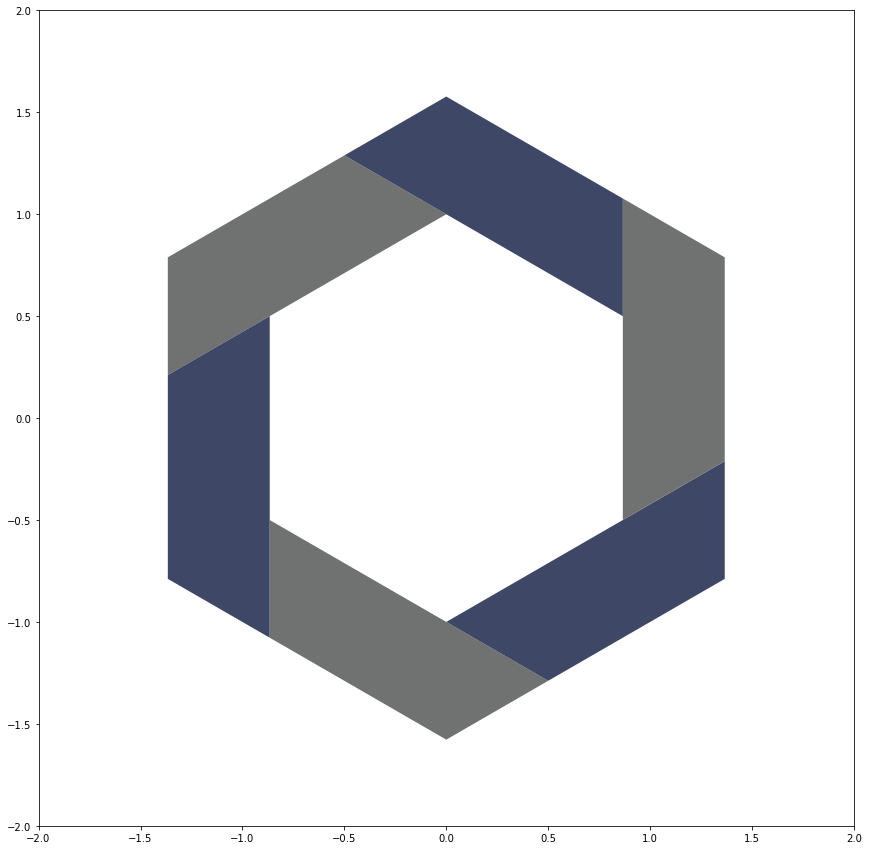

In [34]:
plt.rcParams["figure.figsize"] = (15, 15)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# define parallelogram width and length
wd = 0.5
wo = wd*math.tan(math.radians(30))
le = 1+(wo*2)

hex_x = [0.5, -0.5, -1, -0.5, 0.5, 1]
hex_y = [(math.sqrt(3)/2), (math.sqrt(3)/2), 0, -(math.sqrt(3)/2), -(math.sqrt(3)/2), 0]

hex_x = [0, -(math.sqrt(3)/2), -(math.sqrt(3)/2), 0, (math.sqrt(3)/2), (math.sqrt(3)/2)]
hex_y = [1, 0.5, -0.5, -1, -0.5, 0.5]

# define angle list
ang = [30, 90, 150, 210, 270, 330, 0]
#define color list
nmis_cp = ['#6f7271',
           '#3e4765',
           '#6f7271',
           '#3e4765',
           '#6f7271',
           '#3e4765']

for ind in range(len(hex_x)):
    hex_co = ind
    lo = [hex_x[hex_co], hex_y[hex_co]]
    x = [lo[0], lo[0]-le, lo[0]-le+wo, lo[0]-wo]
    y = [lo[1], lo[1], lo[1]+wd, lo[1]+wd]

    for ind_m in range(len(x)):
        qx, qy = rotate(lo[0], lo[1], x[ind_m], y[ind_m], math.radians(ang[ind]))
        x[ind_m] = qx
        y[ind_m] = qy
    ax.fill(x, y, nmis_cp[ind])
    # ax.scatter(hex_x, hex_y, color = "k")
    
# x = [0.3, 0.6, 0.7, 0.4]
# y = [0.4, 0.4, 0.5, 0.5]
# ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False))